In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve

/Users/siddharthpangotra/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
/Users/siddharthpangotra/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/Users/siddharthpangotra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated al

In [2]:
data = pd.read_csv('datafile/customer_churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Pre-processing
1. Deleting unwanted columns - CustomerID
2. Encoding the columns for better analysis

In [74]:
# Keep the data Df as is, creating a deep copy of data df
df1= data.copy()

In [75]:
df1 = df1.drop(columns=['customerID'], axis=1)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Encoding the columns for better analysis

In [77]:
# getting the unique values for all columns
for x in df1.columns:
    print("\n",x,": ",df1[x].unique())


 gender :  ['Female' 'Male']

 SeniorCitizen :  [0 1]

 Partner :  ['Yes' 'No']

 Dependents :  ['No' 'Yes']

 tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

 PhoneService :  ['No' 'Yes']

 MultipleLines :  ['No phone service' 'No' 'Yes']

 InternetService :  ['DSL' 'Fiber optic' 'No']

 OnlineSecurity :  ['No' 'Yes' 'No internet service']

 OnlineBackup :  ['Yes' 'No' 'No internet service']

 DeviceProtection :  ['No' 'Yes' 'No internet service']

 TechSupport :  ['No' 'Yes' 'No internet service']

 StreamingTV :  ['No' 'Yes' 'No internet service']

 StreamingMovies :  ['No' 'Yes' 'No internet service']

 Contract :  ['Month-to-month' 'One year' 'Two year']

 PaperlessBilling :  ['Yes' 'No']

 PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

#### almost all columns above are categorical columns, therefore we need encoding.
#### amongst the columns, majority columns are binary columns (yes, no) , hence we will assign '0' for No and 1 for 'yes'

In [78]:
# creating a method that sets Yes and No to '0' and '1'
def set_binary_cols(x):
    if x == "Yes":
        
        return 1
    else:
        
        return 0
    
    

In [79]:
df1.Partner = df1['Partner'].apply(set_binary_cols)
df1.Dependents = df1['Dependents'].apply(set_binary_cols)
df1.PhoneService = df1['PhoneService'].apply(set_binary_cols)
df1.MultipleLines = df1['MultipleLines'].apply(set_binary_cols)
df1.InternetService = df1['InternetService'].apply(set_binary_cols)
df1.OnlineSecurity = df1['OnlineSecurity'].apply(set_binary_cols)
df1.OnlineBackup = df1['OnlineBackup'].apply(set_binary_cols)
df1.TechSupport = df1['TechSupport'].apply(set_binary_cols)
df1.StreamingTV = df1['StreamingTV'].apply(set_binary_cols)
df1.StreamingMovies = df1['StreamingMovies'].apply(set_binary_cols)
df1.PaperlessBilling = df1['PaperlessBilling'].apply(set_binary_cols)
df1.Churn = df1['Churn'].apply(set_binary_cols)
df1.DeviceProtection = df1['DeviceProtection'].apply(set_binary_cols)
df1['gender'] = data['gender'].apply(lambda x : 0 if x=="Female" else 1)

In [82]:
df1['TotalCharges']= df1['TotalCharges'].apply(lambda x: 0 if x == " " else float(x))

#### Dtypes  of the columns are still of type object
##### One hot encoding

In [83]:
df1 = pd.get_dummies(df1, columns = ['PaymentMethod', 'Contract','InternetService' ])

In [84]:
# getting the unique values for all columns
for x in df1.columns:
    print("\n",x,": ",df1[x].unique())


 gender :  [0 1]

 SeniorCitizen :  [0 1]

 Partner :  [1 0]

 Dependents :  [0 1]

 tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

 PhoneService :  [0 1]

 MultipleLines :  [0 1]

 OnlineSecurity :  [0 1]

 OnlineBackup :  [1 0]

 DeviceProtection :  [0 1]

 TechSupport :  [0 1]

 StreamingTV :  [0 1]

 StreamingMovies :  [0 1]

 PaperlessBilling :  [1 0]

 MonthlyCharges :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

 TotalCharges :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]

 Churn :  [0 1]

 PaymentMethod_Bank transfer (automatic) :  [0 1]

 PaymentMethod_Credit card (automatic) :  [0 1]

 PaymentMethod_Electronic check :  [1 0]

 PaymentMethod_Mailed check :  [0 1]

 Contract_Month-to-month :  [1 0]

 Contract_One year :  [0 1]

 Contract_Two year :  [0 1]

 InternetService_0 :  [1]


In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


### Analysing Gender wise Churn

In [105]:
#male_churn_yes= df1[df1['Churn']==1].gender
churn_yes_gender= df1[df1['Churn']==1].gender
churn_no_gender =df1[df1['Churn']==0].gender

TypeError: annotate() missing 2 required positional arguments: 's' and 'xy'

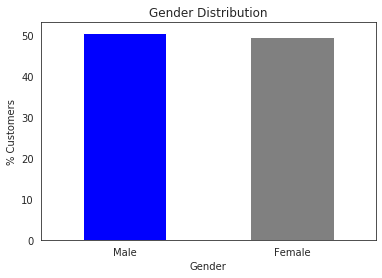

In [158]:
# churn_yes_female = churn_yes_gender[churn_yes_gender==0]
# churn_yes_male = churn_yes_gender[churn_yes_gender==1]
with sns.axes_style("white"):
    ax = (data['gender'].value_counts()*100/len(df1)).plot(kind='bar',stacked = True,rot = 0, color=['Blue','Grey'])
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    ax.set_ylabel('% Customers')
    ax.set_xlabel('Gender')
    ax.set_ylabel('% Customers')
    ax.set_title('Gender Distribution')
    ax.annotate()
    

In [135]:
plt.

/Users/siddharthpangotra/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:2362: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asarray(self.convert_xunits(x))


ValueError: shape mismatch: objects cannot be broadcast to a single shape

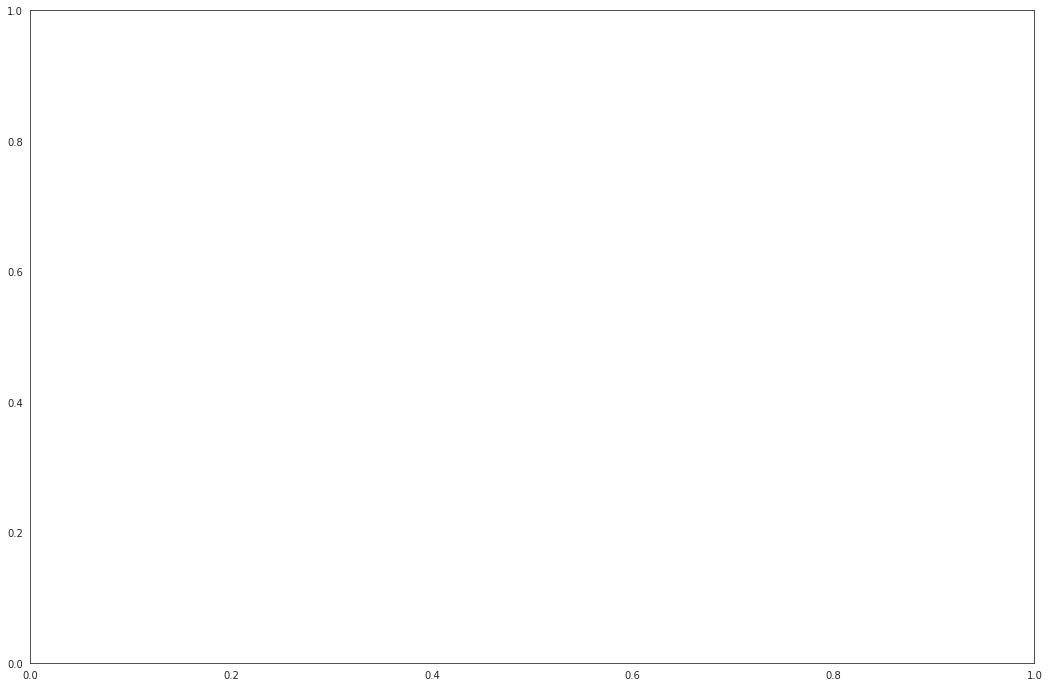

In [136]:
with sns.axes_style("white"):
    
    plt.subplots(figsize=(18,12))
    plt.bar([churn_yes_female, churn_yes_male],height=1 , rwidth=0.95, color=['red','green'],label=['female','Male'])
    plt.legend()
    plt.xlabel("tenure")
    plt.ylabel("Number Of Customers")
    plt.title("Customer Churn Prediction Visualiztion")
    plt.show();